In [7]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

len(x_train)

#shape of testing dataset  10,000 images having 28*28 size
x_test.shape

#normalize the images by scaling pixel intensities to the range 0,1
x_train = x_train / 255
x_test = x_test / 255

#Model Creation
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10, activation='softmax')
])
model.summary()
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#To train the model
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=10)

# Evaluation
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6909 - loss: 1.1202 - val_accuracy: 0.9067 - val_loss: 0.3241
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9073 - loss: 0.3234 - val_accuracy: 0.9252 - val_loss: 0.2627
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9258 - loss: 0.2595 - val_accuracy: 0.9357 - val_loss: 0.2255
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9367 - loss: 0.2263 - val_accuracy: 0.9436 - val_loss: 0.1958
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9443 - loss: 0.1955 - val_accuracy: 0.9470 - val_loss: 0.1776
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9506 - loss: 0.1696 - val_accuracy: 0.9534 - val_loss: 0.1607
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9546 - loss: 0.1584 - val_accuracy: 0.9562 - val_loss: 0.1514
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9579 - loss: 0.1432 - 

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load the breast cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

# Convert to DataFrame for easier manipulation (optional)
df = pd.DataFrame(data=X, columns=cancer.feature_names)
df['target'] = y

# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model creation
mlp = MLPClassifier(hidden_layer_sizes=(13, 10, 2), max_iter=1000)
mlp.fit(X_train, y_train)

# Predictions
predictions = mlp.predict(X_test)

# Model Evaluation
print(confusion_matrix(y_test, predictions))
print("Accuracy Score:", accuracy_score(y_test, predictions) * 100)

# Optional: Classification Report
print(classification_report(y_test, predictions))

[[42  1]
 [ 2 69]]
Accuracy Score: 97.36842105263158
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        43
           1       0.99      0.97      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [1]:
!pip install tensorflow --upgrade
from tensorflow.keras.preprocessing.image import ImageDataGenerator

  Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl.metadata (3.2 kB)
Using cached tensorflow-2.17.0-cp311-cp311-win_amd64.whl (2.0 kB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1


In [8]:
# Convolution neural network on binary classification task: Cat and Dog dataset
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras import layers, models
import numpy as np

# Set the dimensions of the images
IMG_HEIGHT = 150
IMG_WIDTH = 150
BATCH_SIZE = 32

# Load and preprocess training data
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\train",  # Path to the training dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification (cat or dog)
)

# Load and preprocess testing data
test_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values

test_generator = test_datagen.flow_from_directory(
    r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\test",  # Path to the testing dataset
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Binary classification (cat or dog)
)

# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    layers.MaxPooling2D(),  # Reduce dimensions after convolution
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),  # Flatten the data for the dense layers
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_generator, epochs=10, validation_data=test_generator)

# Function to classify a new image
def classify_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))  # Load the image
    img_array = img_to_array(img) / 255.0  # Convert to array and normalize
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)  # Make prediction
    class_label = 'Dog' if prediction[0][0] > 0.5 else 'Cat'  # Determine class
    return class_label

# Example usage
image_path = r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\test\cats\cat_255.jpg"  # Replace with your image path
result = classify_image(image_path)  # Classify the image
print('The image is classified as:', result)  # Output the result

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


C:\Users\Santhosh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 14s 526ms/step - accuracy: 0.4601 - loss: 1.0631 - val_accuracy: 0.5000 - val_loss: 0.6989
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 494ms/step - accuracy: 0.5381 - loss: 0.6906 - val_accuracy: 0.5071 - val_loss: 0.6962
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 499ms/step - accuracy: 0.5349 - loss: 0.6881 - val_accuracy: 0.5143 - val_loss: 0.6922
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step - accuracy: 0.5329 - loss: 0.6908 - val_accuracy: 0.5357 - val_loss: 0.6853
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 497ms/step - accuracy: 0.6013 - loss: 0.6777 - val_accuracy: 0.5357 - val_loss: 0.6844
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 437ms/step - accuracy: 0.5537 - loss: 0.6916 - val_accuracy: 0.5500 - val_loss: 0.6986
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 476ms/step - accuracy: 0.5409 - loss: 0.6826 - val_accuracy: 0.5071 - val_loss: 0.6991
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 487ms/step - accuracy: 0.5565 - loss: 0.6735 - val_accu

In [9]:
image_path = r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\test\dogs\dog_147.jpg" # Replace with your image path
result = classify_image(image_path)  # Classify the image
print('The image is classified as:', result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
The image is classified as: Dog


Found 447 images belonging to 2 classes.
Found 110 images belonging to 2 classes.


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 218)                 │         111,834 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             219 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 205,301 (801.96 KB)

 Trainable params: 205,301 (801.96 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 375ms/step - accuracy: 0.4666 - loss: 0.7035 - val_accuracy: 0.4800 - val_loss: 0.6940
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.6851 - val_accuracy: 0.7000 - val_loss: 0.6735
Epoch 3/20


C:\Users\Santhosh\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.4643 - loss: 0.6978 - val_accuracy: 0.6000 - val_loss: 0.6912
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6000 - loss: 0.6913 - val_accuracy: 0.7000 - val_loss: 0.6868
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.5354 - loss: 0.6913 - val_accuracy: 0.6500 - val_loss: 0.6894
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5200 - loss: 0.6884 - val_accuracy: 0.7000 - val_loss: 0.6850
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.6188 - loss: 0.6827 - val_accuracy: 0.6000 - val_loss: 0.6726
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6400 - loss: 0.6666 - val_accuracy: 0.7000 - val_loss: 0.6970
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 304ms/step - accuracy: 0.6399 - loss: 0.6597 - val_accuracy: 0.6500 - val_loss: 0.6517
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7200 - loss: 0.6030 - val_accuracy: 0.6000 - val_loss: 0

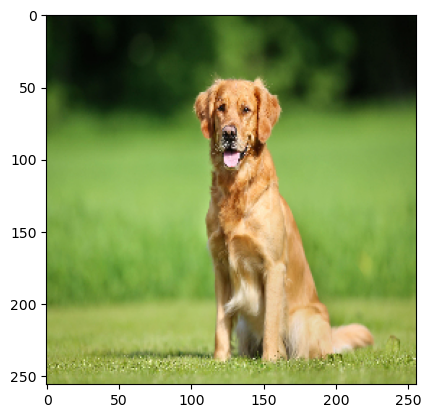

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
cat


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_16880\1035292435.py:73: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_idx=int(prediction>0.5)


In [15]:
import numpy as np
import  tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
import os
import pandas as pd
import matplotlib.pyplot as plt

dir=r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\train"

datagen=ImageDataGenerator(
validation_split=0.2,
rescale=1./255)

training=datagen.flow_from_directory(
dir,
target_size=(256,256),
batch_size=25,
class_mode="binary",
subset="training")

testing=datagen.flow_from_directory(
dir,
target_size=(256,256),
batch_size=25,
class_mode="binary",
subset="validation")

model=tf.keras.Sequential()


model = Sequential()
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(256,256,3)))
model.add(MaxPooling2D((8,8)))  
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D((4,4))) 
model.add(Conv2D(128,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))  
model.add(Flatten())
model.add(Dense(218,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])

steps_per_epoch_training=training.samples//training.batch_size
steps_per_epoch_training 

step_per_epoch_valid=testing.samples//testing.batch_size
step_per_epoch_valid

fit=model.fit(
training,
steps_per_epoch=steps_per_epoch_training,
epochs=20,
validation_data=testing,
validation_steps=step_per_epoch_valid)

'''print("Class indices:", training.class_indices)

def predicted_image(filename):
    imgs=load_img(filename,target_size=(256,256))
    plt.imshow(imgs)
    plt.show()
    img_array=img_to_array(imgs)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    
    prediction=model.predict(img_array)
    predicted_probability = prediction[0, 0]
    class_idx=int(prediction>0.5)
    
    if class_idx==1:
        print("cat")
        
    else:
        print("dog")

predicted_image(r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\train\dogs\dog_51.jpg")'''


Class indices: {'cats': 0, 'dogs': 1}


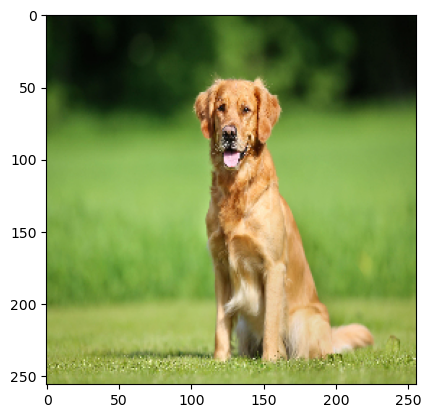

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
dog


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_16880\2911163980.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_idx=int(prediction>0.5)


In [17]:
print("Class indices:", training.class_indices)

def predicted_image(filename):
    imgs=load_img(filename,target_size=(256,256))
    plt.imshow(imgs)
    plt.show()
    img_array=img_to_array(imgs)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    
    prediction=model.predict(img_array)
    predicted_probability = prediction[0, 0]
    class_idx=int(prediction>0.5)
    
    if class_idx==1:
        print("dog")
        
    else:
        print("cat")

predicted_image(r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\train\dogs\dog_51.jpg")


Class indices: {'cats': 0, 'dogs': 1}


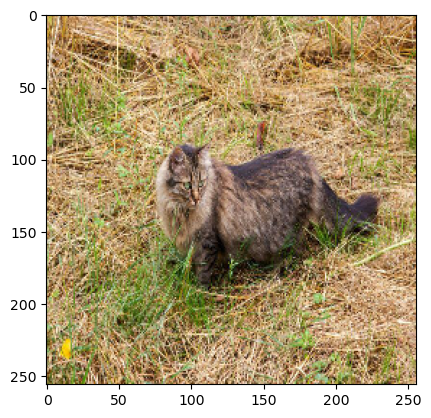

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
cat


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_16880\1886435651.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  class_idx=int(prediction>0.5)


In [19]:
print("Class indices:", training.class_indices)

def predicted_image(filename):
    imgs=load_img(filename,target_size=(256,256))
    plt.imshow(imgs)
    plt.show()
    img_array=img_to_array(imgs)
    img_array=np.expand_dims(img_array,axis=0)
    img_array/=255.0
    
    prediction=model.predict(img_array)
    predicted_probability = prediction[0, 0]
    class_idx=int(prediction>0.5)
    
    if class_idx==1:
        print("dog")
        
    else:
        print("cat")
predicted_image(r"C:\Users\Santhosh\OneDrive\Desktop\deep\binary classification\archive (4)\train\cats\cat_26.jpg")


Found 435 images belonging to 8 classes.
Found 106 images belonging to 8 classes.


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_22 (Conv2D)                   │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_8 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 8)                   │           1,032 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 159,944 (624.78 KB)

 Trainable params: 159,944 (624.78 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 574ms/step - accuracy: 0.1537 - loss: 2.0841 - val_accuracy: 0.1800 - val_loss: 2.0658
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1600 - loss: 2.0500 - val_accuracy: 0.0000e+00 - val_loss: 1.9875
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 14s 552ms/step - accuracy: 0.2053 - loss: 2.0320 - val_accuracy: 0.2300 - val_loss: 2.0275
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1200 - loss: 2.0336 - val_accuracy: 0.3333 - val_loss: 1.9414
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 502ms/step - accuracy: 0.2264 - loss: 1.9894 - val_accuracy: 0.2700 - val_loss: 1.9151
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0800 - loss: 2.0723 - val_accuracy: 0.1667 - val_loss: 1.6333
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 521ms/step - accuracy: 0.3159 - loss: 1.8532 - val_accuracy: 0.2100 - val_loss: 1.9302
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.2000 - loss: 1.8642 - val_accuracy: 0

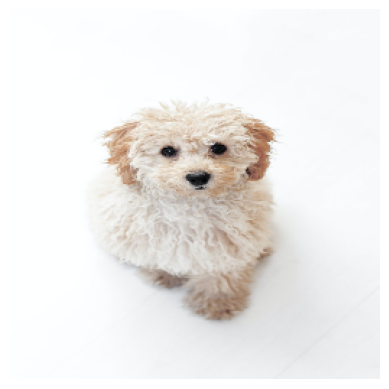

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Predicted breed: poodle


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import pandas as pd
import matplotlib.pyplot as plt

# Path to the training directory containing subdirectories for each breed
dir = r"C:\Users\Santhosh\OneDrive\Desktop\deep\multiclass_\dog-breeds"

# Setup ImageDataGenerator for data augmentation and splitting
datagen = ImageDataGenerator(
    validation_split=0.2,
    rescale=1./255
)

# Creating the training set
training = datagen.flow_from_directory(
    dir,
    target_size=(256, 256),
    batch_size=25,
    class_mode="categorical",  # Change to categorical for multi-class
    subset="training"
)

# Creating the validation set
testing = datagen.flow_from_directory(
    dir,
    target_size=(256, 256),
    batch_size=25,
    class_mode="categorical",  # Change to categorical for multi-class
    subset="validation"
)

# Build the CNN model
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=(256, 256, 3)))
model.add(MaxPooling2D((8, 8)))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((4, 4)))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(len(training.class_indices), activation="softmax"))  # Use softmax for multi-class

model.summary()

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Calculate steps per epoch
steps_per_epoch_training = training.samples // training.batch_size
steps_per_epoch_valid = testing.samples // testing.batch_size

# Train the model
fit = model.fit(
    training,
    steps_per_epoch=steps_per_epoch_training,
    epochs=20,
    validation_data=testing,
    validation_steps=steps_per_epoch_valid
)

# Function to classify a new image
def predicted_image(filename):
    img = load_img(filename, target_size=(256, 256))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
    
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image
    
    prediction = model.predict(img_array)
    predicted_class_idx = np.argmax(prediction[0])  # Get the index of the predicted class
    class_label = list(training.class_indices.keys())[predicted_class_idx]  # Map index to class label
    
    print("Predicted breed:", class_label)

# Example usage: Replace with your image path
predicted_image(r"C:\Users\Santhosh\OneDrive\Desktop\deep\multiclass_\dog-breeds\poodle\poodle63.jpg")


In [ ]:
#6Transfer learning using pre-trained architectures

In [25]:
!pip install --upgrade ipywidgets

In [26]:
!pip install --upgrade jupyterlab

  Using cached jupyterlab-4.2.5-py3-none-any.whl.metadata (16 kB)
Using cached jupyterlab-4.2.5-py3-none-any.whl (11.6 MB)
  Attempting uninstall: jupyterlab
    Found existing installation: jupyterlab 4.0.13
    Uninstalling jupyterlab-4.0.13:
      Successfully uninstalled jupyterlab-4.0.13


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
notebook 7.0.8 requires jupyterlab<4.1,>=4.0.2, but you have jupyterlab 4.2.5 which is incompatible.


In [27]:
!pip install jupyter tensorflow tensorflow-datasets

  Using cached jupyterlab-4.0.13-py3-none-any.whl.metadata (15 kB)
Using cached jupyterlab-4.0.13-py3-none-any.whl (9.2 MB)
  Attempting uninstall: jupyterlab
    Found existing installation: jupyterlab 4.2.5
    Uninstalling jupyterlab-4.2.5:
      Successfully uninstalled jupyterlab-4.2.5


In [30]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import tensorflow_datasets as tfds

# Load the Flowers dataset
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)

# Get the training dataset
train_ds = dataset['train']

# Manually split the dataset into training and validation sets
train_size = int(0.8 * info.splits['train'].num_examples)
val_size = info.splits['train'].num_examples - train_size

train_ds = train_ds.take(train_size)
val_ds = dataset['train'].skip(train_size)

# Define image size and batch size
IMG_SIZE = 224
BATCH_SIZE = 32

# Function to preprocess the images
def preprocess_image(image, label):
    image = tf.image.resize(image, [IMG_SIZE, IMG_SIZE])  # Resize images to 224x224
    image = tf.cast(image, tf.float32) / 255.0  # Normalize pixel values to [0, 1]
    return image, label

# Apply preprocessing to both training and validation datasets
train_ds = train_ds.map(preprocess_image).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.map(preprocess_image).cache().batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Load MobileNetV2 as the base model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze the base model layers

# Build the model with the pre-trained base and custom classification layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(info.features['label'].num_classes, activation='softmax')  # Softmax activation for multi-class classification
])

# Model summary
model.summary()

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_ds,
    epochs=3,
    validation_data=val_ds
)

# Evaluate the model on the validation dataset
loss, accuracy = model.evaluate(val_ds)
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ ?                           │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 56s 533ms/step - accuracy: 0.6680 - loss: 0.9272 - val_accuracy: 0.8842 - val_loss: 0.3286
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 50s 543ms/step - accuracy: 0.8859 - loss: 0.3321 - val_accuracy: 0.8978 - val_loss: 0.3248
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 51s 561ms/step - accuracy: 0.8978 - loss: 0.2774 - val_accuracy: 0.8965 - val_loss: 0.3073
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 436ms/step - accuracy: 0.8837 - loss: 0.3211
Validation Accuracy: 89.65%


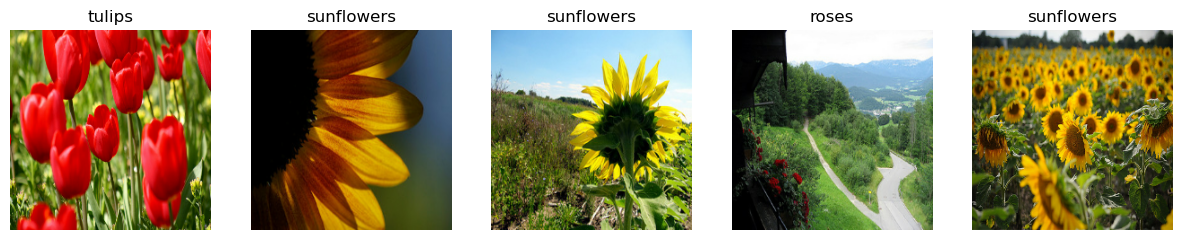

In [31]:
def show_sample_images(dataset, num_images=5):
    plt.figure(figsize=(15, 5))
    for images, labels in dataset.take(1):  # Take one batch
        for i in range(num_images):
            ax = plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(info.features['label'].int2str(labels[i].numpy()))  # Convert label index to class name
            plt.axis("off")
    plt.show()

# Show sample images
show_sample_images(train_ds)

In [32]:
!pip install keras-tuner

   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   --------------- ------------------------ 51.2/129.1 kB 2.7 MB/s eta 0:00:01
   ------------------------- -------------- 81.9/129.1 kB 1.2 MB/s eta 0:00:01
   ------------------------------ ------- 102.4/129.1 kB 980.4 kB/s eta 0:00:01
   ------------------------------------ - 122.9/129.1 kB 722.1 kB/s eta 0:00:01
   -------------------------------------- 129.1/129.1 kB 585.7 kB/s eta 0:00:00


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import keras_tuner as kt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

def build_model(hp):
    model = Sequential() 
    # Hyperparameter: Number of Conv layers
    for i in range(hp.Int('num_conv_layers', 1, 3)):  # Between 1 and 3 Conv layers
        model.add(Conv2D(
            filters=hp.Int(f'filters_{i}', min_value=32, max_value=128, step=32),
            kernel_size=hp.Choice(f'kernel_size_{i}', values=[3, 5]),
            activation='relu', 
            input_shape=(28, 28, 1),
            padding='same'
        ))
        model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())
    for i in range(hp.Int('num_dense_layers', 1, 2)):  # Between 1 and 2 Dense layers
        model.add(Dense(
            units=hp.Int(f'dense_units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))
    # Hyperparameter: Dropout rate
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))
    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam', 'sgd']),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,  # Number of model variations to try
    executions_per_trial=2,  # Number of times to evaluate each model
    directory='my_dir_fashion',
    project_name='fashion_mnist_hyperparam_optimization'
)

tuner.search_space_summary()

tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]

loss, accuracy = best_model.evaluate(x_test, y_test)
print(f"Best model accuracy on test set: {accuracy * 100:.2f}%")

best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best hyperparameters:", best_hyperparameters)

y_pred = best_model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

test_accuracy = tf.reduce_mean(tf.cast(y_pred_classes == y_test_classes, tf.float32))
print(f"Test accuracy: {test_accuracy.numpy() * 100:.2f}%")

Trial 2 Complete [00h 01m 52s]
val_accuracy: 0.8605499863624573

Best val_accuracy So Far: 0.9018000066280365
Total elapsed time: 00h 05m 20s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
1                 |3                 |num_conv_layers
96                |96                |filters_0
5                 |3                 |kernel_size_0
1                 |2                 |num_dense_layers
256               |64                |dense_units_0
0.3               |0.4               |dropout_rate
adam              |adam              |optimizer
96                |32                |filters_1
5                 |3                 |kernel_size_1
96                |32                |filters_2
5                 |3                 |kernel_size_2
128               |64                |dense_units_1

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.8191 - loss: 0.5080 - val_accuracy: 0.8936 - val_loss: 0.2951
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━

KeyboardInterrupt: 

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

y_train_segmentation = np.where(x_train > 0.1, 1.0, 0.0)
y_test_segmentation = np.where(x_test > 0.1, 1.0, 0.0)


def create_cnn_gru_model(input_shape=(28, 28, 1)):
    inputs = layers.Input(shape=input_shape)

    x = layers.Conv2D(32, (3, 3), padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(64, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Reshape((28 * 28, 64))(x)

    x = layers.GRU(128, return_sequences=True)(x)
    x = layers.GRU(64, return_sequences=True)(x)

    x = layers.Reshape((28, 28, 64))(x)

    x = layers.Conv2DTranspose(32, (3, 3), padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    output = layers.Conv2D(1, (1, 1), activation='sigmoid')(x)

    model = models.Model(inputs, output)
    return model


model = create_cnn_gru_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
EPOCHS = 5
BATCH_SIZE = 32

history = model.fit(x_train, y_train_segmentation, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(x_test, y_test_segmentation),steps_per_epoch=10)

test_loss, test_accuracy = model.evaluate(x_test, y_test_segmentation)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

predictions = model.predict(x_test)
predictions


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.7807 - loss: 0.4142 - val_accuracy: 0.4939 - val_loss: 0.6522
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 7s/step - accuracy: 0.9684 - loss: 0.1327 - val_accuracy: 0.4554 - val_loss: 0.6668
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.9752 - loss: 0.1029 - val_accuracy: 0.4549 - val_loss: 0.7310
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.9817 - loss: 0.0843 - val_accuracy: 0.4583 - val_loss: 0.7680
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 54s 6s/step - accuracy: 0.9813 - loss: 0.0774 - val_accuracy: 0.4582 - val_loss: 0.8518
313/313 ━━━━━━━━━━━━━━━━━━━━ 51s 162ms/step - accuracy: 0.4589 - loss: 0.8509
Test Loss: 0.8517711758613586, Test Accuracy: 0.4582345187664032
313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step


NameError: name 'plt' is not defined

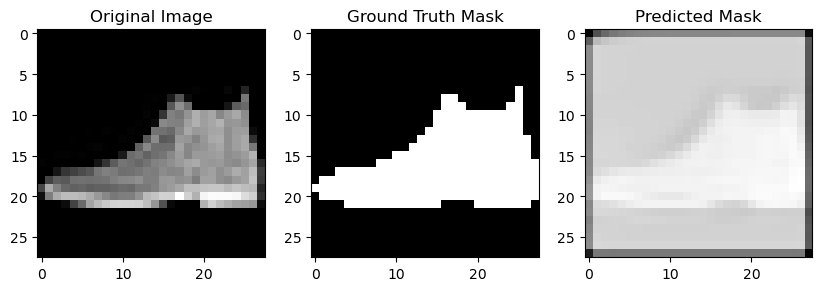

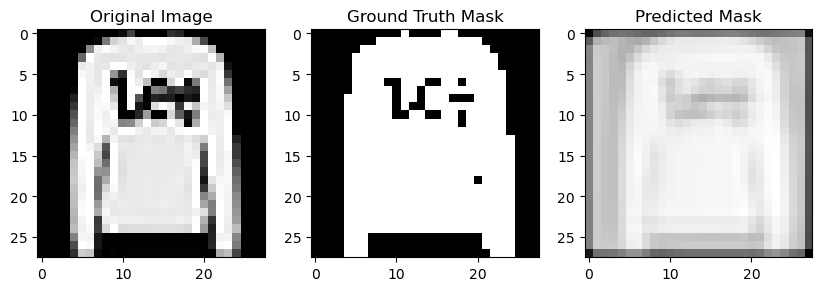

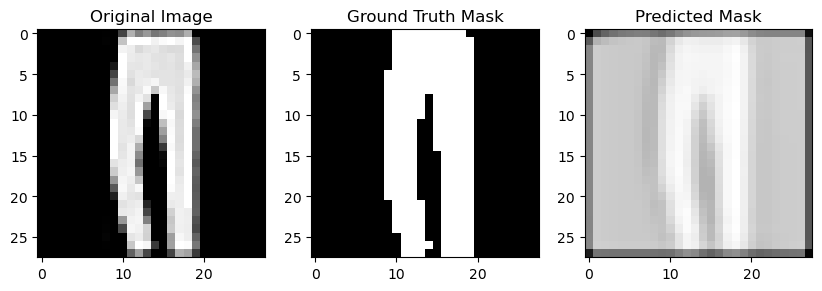

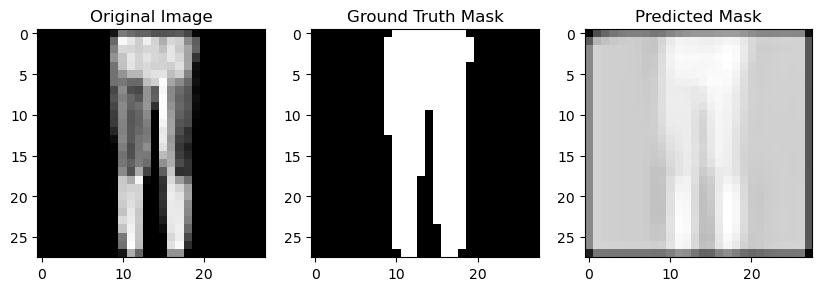

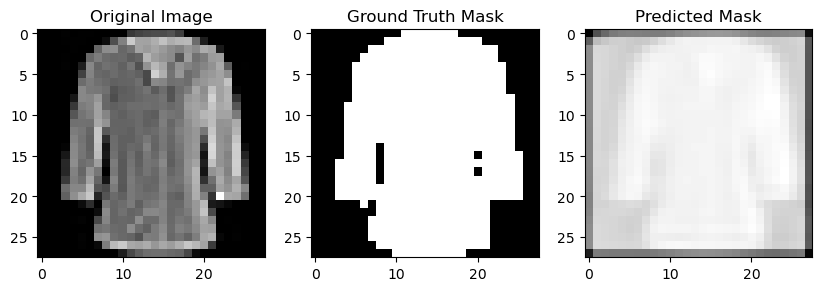

In [3]:
import matplotlib.pyplot as plt
def visualize_results(images, masks, preds, num_examples=5):
    for i in range(num_examples):
        plt.figure(figsize=(10, 3))
        # Original image
        plt.subplot(1, 3, 1)
        plt.title('Original Image')
        plt.imshow(images[i].reshape(28, 28), cmap='gray')

        # Ground truth segmentation mask
        plt.subplot(1, 3, 2)
        plt.title('Ground Truth Mask')
        plt.imshow(masks[i].reshape(28, 28), cmap='gray')

        # Predicted segmentation mask
        plt.subplot(1, 3, 3)
        plt.title('Predicted Mask')
        plt.imshow(preds[i].reshape(28, 28), cmap='gray')
        plt.show()

visualize_results(x_test, y_test_segmentation, predictions)


Epoch 1/100


C:\Users\Santhosh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 480154048.0000 - mean_squared_error: 480154048.0000 - val_loss: 476905408.0000 - val_mean_squared_error: 476905408.0000
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 450891648.0000 - mean_squared_error: 450891648.0000 - val_loss: 476874144.0000 - val_mean_squared_error: 476874144.0000
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 471979328.0000 - mean_squared_error: 471979328.0000 - val_loss: 476799232.0000 - val_mean_squared_error: 476799232.0000
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 460336032.0000 - mean_squared_error: 460336032.0000 - val_loss: 476638144.0000 - val_mean_squared_error: 476638144.0000
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 476094208.0000 - mean_squared_error: 476094208.0000 - val_loss: 476348480.0000 - val_mean_squared_error: 476348480.0000
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 456888992.0000 - mean_squared_error: 456888992.0000 - val

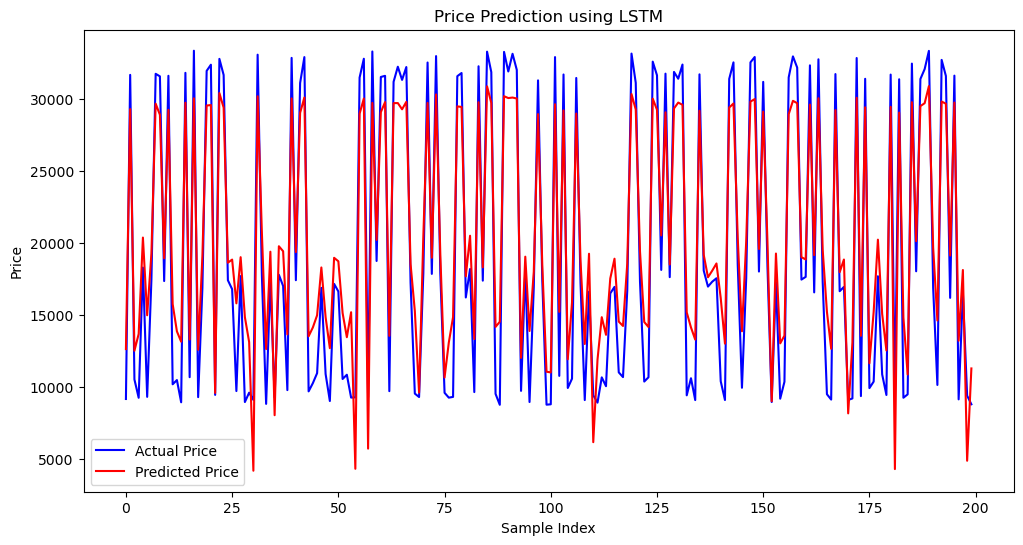

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 9672749.0000 - mean_squared_error: 9672749.0000    
Mean Squared Error: [9245194.0, 9245194.0]


In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv(r"C:\Users\Santhosh\OneDrive\Desktop\deep\lastm price prediction\Laptop_price.csv")

# Data preprocessing
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=['Brand', 'Screen_Size', 'Weight'], drop_first=True)

# Normalize features
scaler = MinMaxScaler()
features = data.drop('Price', axis=1).values
features_scaled = scaler.fit_transform(features)

# Reshape features for LSTM input (samples, timesteps, features)
features_scaled = features_scaled.reshape((features_scaled.shape[0], 1, features_scaled.shape[1]))

# Define target variable
target = data['Price'].values

# Split into training and testing sets
train_size = int(len(features_scaled) * 0.8)
x_train, x_test = features_scaled[:train_size], features_scaled[train_size:]
y_train, y_test = target[:train_size], target[train_size:]

# Build the LSTM model
model = models.Sequential()
model.add(layers.LSTM(100, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2]), return_sequences=True))
model.add(layers.Dropout(0.2))
model.add(layers.LSTM(50, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(1))

# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# Predict the test data
predictions = model.predict(x_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title('Price Prediction using LSTM')
plt.xlabel('Sample Index')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model
mse = model.evaluate(x_test, y_test)
print(f'Mean Squared Error: {mse}')


In [12]:
!pip install tensorflow-datasets


Skipping corrupt image: Abyssinian_34.jpg
Skipping corrupt image: Egyptian_Mau_139.jpg
Skipping corrupt image: Egyptian_Mau_145.jpg
Skipping corrupt image: Egyptian_Mau_167.jpg
Skipping corrupt image: Egyptian_Mau_177.jpg
Skipping corrupt image: Egyptian_Mau_191.jpg
Total images loaded: 7384
Total masks loaded: 7384
Total images loaded: 7384
Total masks loaded: 7384


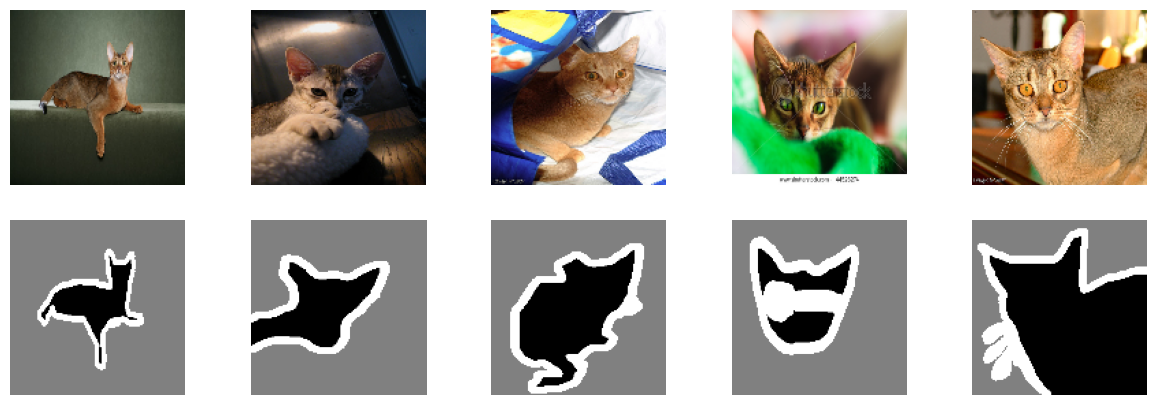

In [14]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split

# Load images and masks
def load_data(image_dir, mask_dir):
    images = []
    masks = []
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg'):
            img_path = os.path.join(image_dir, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize to 128x128
                images.append(img)
            else:
                print(f"Skipping corrupt image: {filename}")
                continue  # Skip to the next file
            
            # Load corresponding mask
            mask_filename = filename.replace('.jpg', '.png')  # Convert image filename to mask filename
            mask_path = os.path.join(mask_dir, mask_filename)
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            if mask is not None:
                mask = cv2.resize(mask, (128, 128))  # Resize to 128x128
                masks.append(mask)
            else:
                print(f"Skipping missing mask for image: {filename}")

    # Check the lengths of the loaded images and masks
    print(f"Total images loaded: {len(images)}")
    print(f"Total masks loaded: {len(masks)}")

    # Ensure images and masks have the same length
    if len(images) != len(masks):
        print("Warning: The number of images and masks do not match!")
    
    return np.array(images), np.array(masks)


image_dir = r"C:\Users\Santhosh\OneDrive\Desktop\deep\lstm image\archive (4)\images\images"
mask_dir = r"C:\Users\Santhosh\OneDrive\Desktop\deep\lstm image\archive (4)\annotations\annotations\trimaps"

images, masks = load_data(image_dir, mask_dir)

print(f"Total images loaded: {len(images)}")
print(f"Total masks loaded: {len(masks)}")

if len(images) == 0 or len(masks) == 0:
    raise ValueError("No images or masks were loaded. Check the dataset paths.")


# Example to visualize a few images and their masks
def visualize_images(images, masks, n=5):
    plt.figure(figsize=(15, 5))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.subplot(2, n, i + n + 1)
        plt.imshow(masks[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Visualize some images and their masks
visualize_images(images, masks)

Epoch 1/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4614 - val_loss: 0.3166
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.3095 - val_loss: 0.3019
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2979 - val_loss: 0.2958
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2932 - val_loss: 0.2921
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2886 - val_loss: 0.2889
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2860 - val_loss: 0.2864
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2836 - val_loss: 0.2857
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2818 - val_loss: 0.2831
Epoch 9/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2800 - val_loss: 0.2819
Epoch 10/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2789 - val_loss: 0.2811
Epoch 11/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.2783 - val_loss: 0.2800
Epoch 12/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

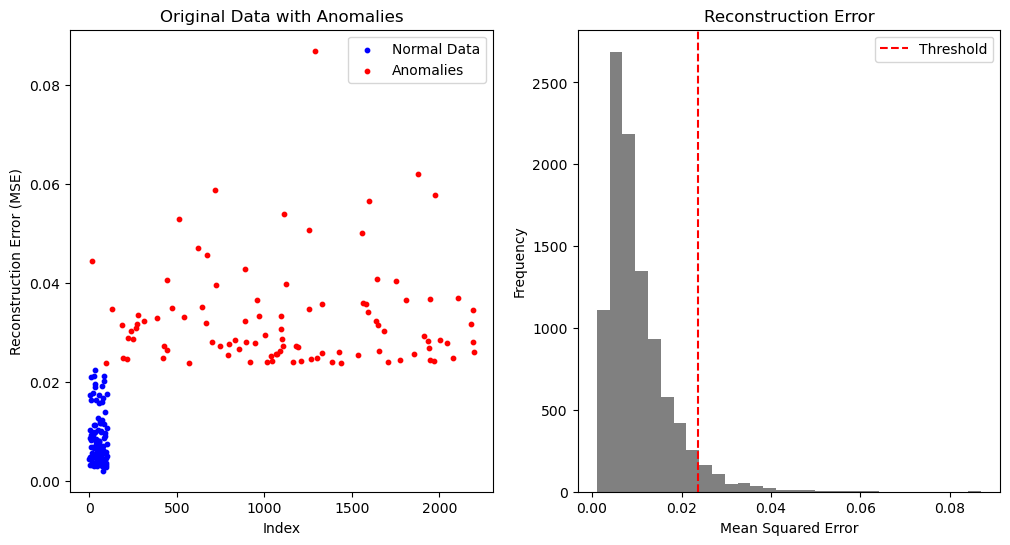

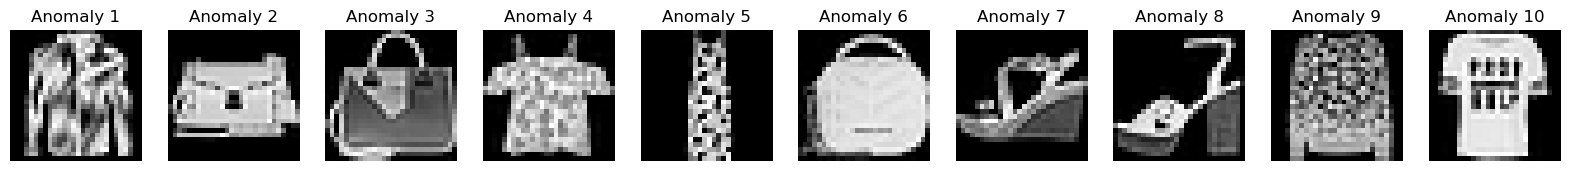

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import fashion_mnist

# Load Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data to [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape data for Autoencoder (flatten images)
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# Define Autoencoder model
def create_autoencoder():
    model = keras.Sequential([
        layers.Input(shape=(28 * 28,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(28 * 28, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy')
    return model

# Create and train the Autoencoder
autoencoder = create_autoencoder()
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, validation_split=0.1)

# Detect anomalies
reconstructed = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)

# Set a threshold for reconstruction error
threshold = np.percentile(mse, 95)  # You can adjust this percentile based on your needs
print(f"Anomaly detection threshold: {threshold}")

# Flag anomalies
anomalies = mse > threshold

# Visualize results
plt.figure(figsize=(12, 6))

# Plotting original data with flagged anomalies
plt.subplot(1, 2, 1)
plt.title("Original Data with Anomalies")
normal_data_indices = np.where(~anomalies)[0]
anomaly_data_indices = np.where(anomalies)[0]

# Plot normal data
plt.scatter(normal_data_indices[:100], mse[normal_data_indices[:100]], color='blue', label='Normal Data', s=10)
# Plot anomalies
plt.scatter(anomaly_data_indices[:100], mse[anomaly_data_indices[:100]], color='red', label='Anomalies', s=10)

plt.xlabel("Index")
plt.ylabel("Reconstruction Error (MSE)")
plt.legend()

# Plotting reconstruction error
plt.subplot(1, 2, 2)
plt.title("Reconstruction Error")
plt.hist(mse, bins=30, color='gray')
plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel("Mean Squared Error")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualize some anomalies
n_anomalies = 10
anomaly_indices = np.where(anomalies)[0][:n_anomalies]
plt.figure(figsize=(20, 4))
for i, idx in enumerate(anomaly_indices):
    plt.subplot(2, n_anomalies, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f'Anomaly {i + 1}')
    plt.axis('off')

plt.show()
